# Importing Libraries 

In [18]:
import numpy as np
import pandas as pd 
from joblib import dump
import joblib as joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data and Exploring

In [21]:
syn = pd.read_csv("D:/Crop-Recommendation/Data/synthetic_yield2[1].csv")
syn.head()

,zinc,boron,phosphorus,potassium,sulphur,Nitrogen,Temperature,yield_label
0,8.616335,7.620756,81.784734,140.817239,23.351596,74.081761,32.652417,poor
1,6.486142,0.855687,55.697974,136.034350,12.341266,45.088763,37.551394,good
2,-3.050063,11.158807,59.495178,122.218101,13.002437,120.940035,15.650607,poor
3,13.717410,1.216561,62.221481,135.282530,14.137695,53.456172,43.601510,good
4,24.642487,-3.122935,67.836295,147.088947,19.535948,110.906299,50.025609,poor


<Axes: >

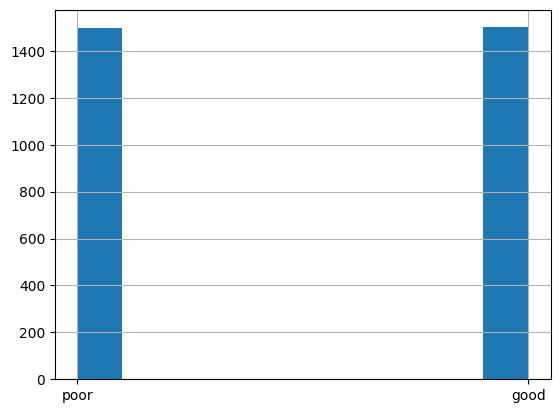

In [22]:
syn['yield_label'].hist()

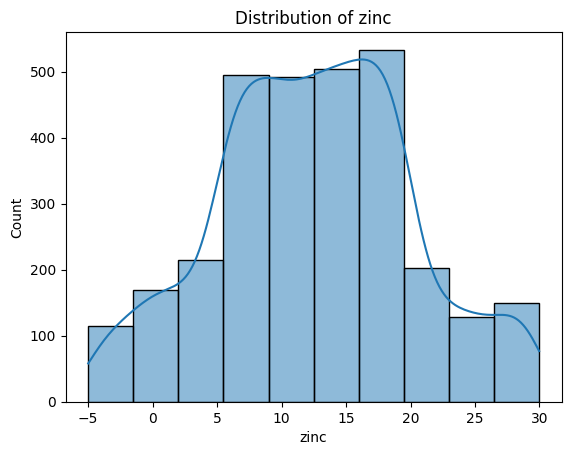

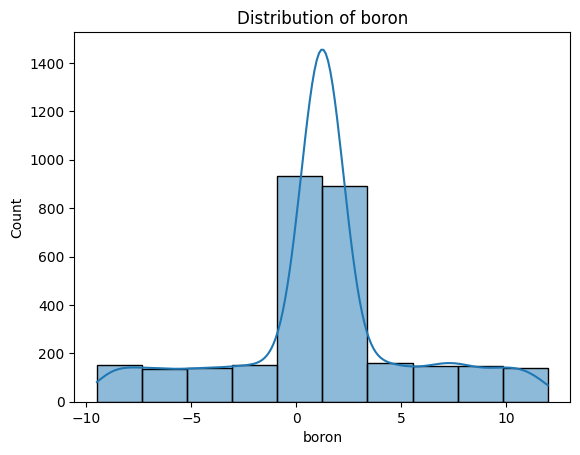

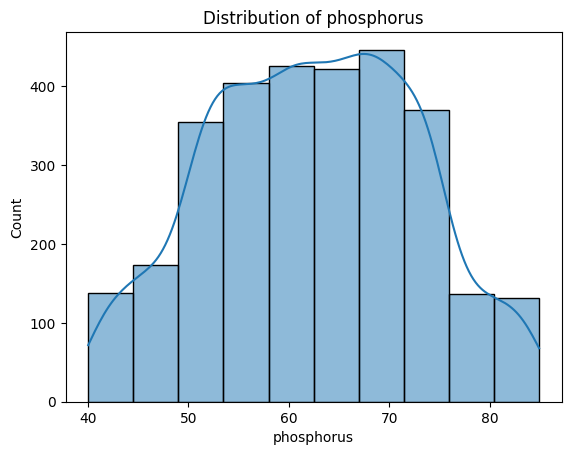

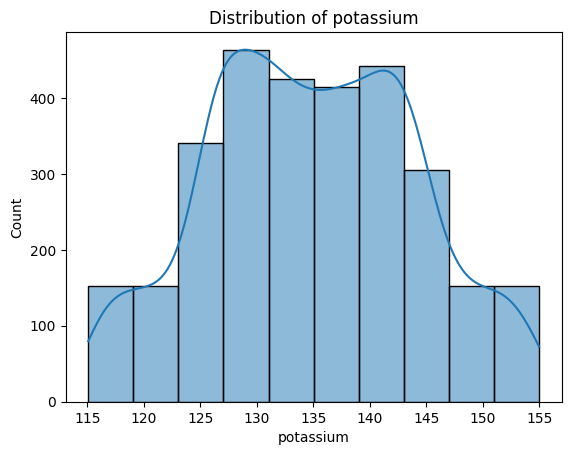

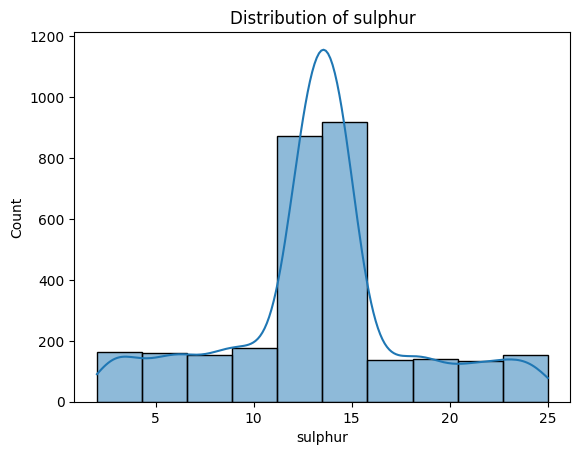

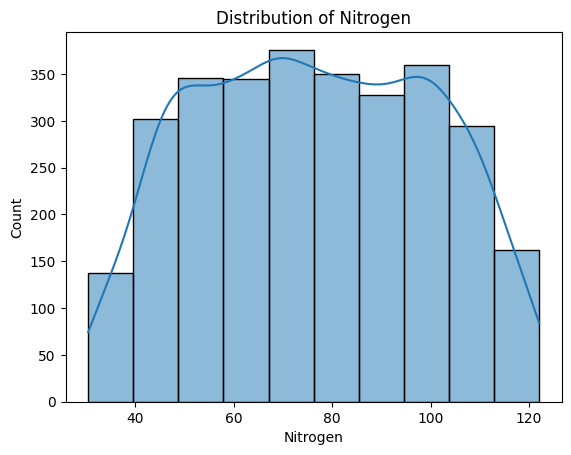

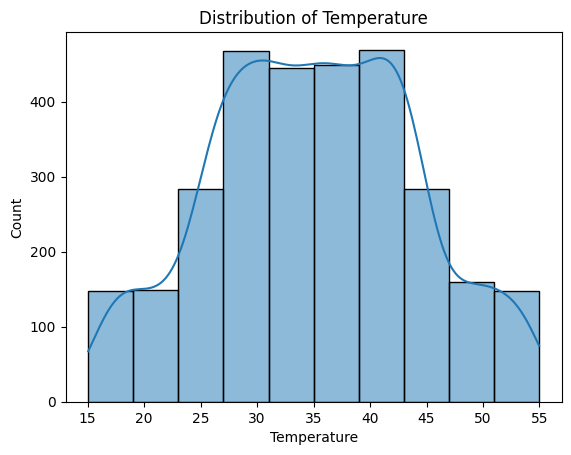

In [23]:
x = syn.drop(['yield_label'], axis=1)
for i in x.columns:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i, data = syn , kde = True , bins = 10)
    plt.show()

In [24]:
syn.nunique()

zinc           3000
boron          3000
phosphorus     3000
potassium      3000
sulphur        3000
Nitrogen       3000
Temperature    3000
yield_label       2
dtype: int64

# Data preprocessing

In [25]:

 
syn['yield_label'] = syn['yield_label'].map({'poor': 0, 'good': 1})


syn_ = syn.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: >

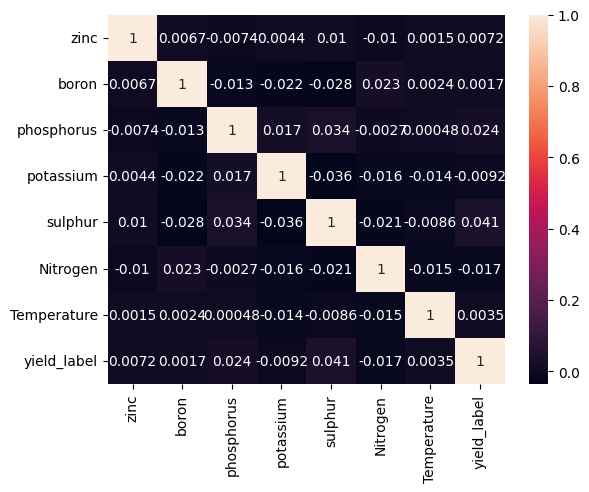

In [40]:
sns.heatmap(syn.corr(), annot = True)

In [26]:
syn_.head()

,zinc,boron,phosphorus,potassium,sulphur,Nitrogen,Temperature,yield_label
0,27.085213,-6.990486,56.488825,128.029530,4.718865,101.868397,44.987573,0
1,8.264532,-1.627962,74.408033,145.801941,17.430924,89.412524,21.341263,0
2,0.435892,9.135055,42.250001,116.315715,6.014381,85.244667,39.218091,0
3,9.122962,1.701174,60.230799,133.654326,12.812459,90.795268,26.308378,1
4,17.775539,1.580873,55.691465,140.557503,13.394805,91.981186,43.524673,1


In [27]:
scaler = StandardScaler()
x = syn.drop(['yield_label'], axis = 1)
x = scaler.fit_transform(x)
joblib.dump(scaler, 'D:/Crop-Recommendation/Model/scaler.pkl')  

['D:/Crop-Recommendation/Model/scaler.pkl']

# Training and model building

In [28]:
from sklearn.model_selection import train_test_split
y = syn['yield_label']

xtrain , xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
  
model = Sequential()

# Adding the input layer with dropout regularization
model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a dropout rate of 0.2

# Add the hidden layers with dropout regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a dropout rate of 0.2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a dropout rate of 0.2

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary cross-entropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

 
model.summary()


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5060 - loss: 0.6604 - val_accuracy: 0.5633 - val_loss: 0.5613
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5097 - val_accuracy: 0.9800 - val_loss: 0.3369
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - loss: 0.2951 - val_accuracy: 0.9850 - val_loss: 0.1124
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.1309 - val_accuracy: 0.9950 - val_loss: 0.0483
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0688 - val_accuracy: 0.9933 - val_loss: 0.0307
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9900 - loss: 0.0479 - val_accuracy: 0.9950 - val_loss: 0.0227
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9894 - loss: 0.0457 - val_accuracy: 0.9967 - val_loss: 0.0192
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0397 - val_accuracy: 0.9967 - val_loss:

In [31]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9929 - loss: 0.0245
Test accuracy: 0.9933333396911621


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

In [33]:
model.save("D:/Crop-Recommendation/Model/synthetic_yield_model.keras")

In [34]:
 
 
n_splits = 5  
 
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
 
cv_accuracies = []
 
for train_index, test_index in skf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
     
    model.fit(X_train, y_train)
     
    _, accuracy = model.evaluate(X_test, y_test)
     
    cv_accuracies.append(accuracy)
 
mean_cv_accuracy = np.mean(cv_accuracies)
std_cv_accuracy = np.std(cv_accuracies)

print("Cross-validation accuracies:", cv_accuracies)
print("Mean CV accuracy:", mean_cv_accuracy)
print("Standard deviation of CV accuracies:", std_cv_accuracy)
 

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0237
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 1.0000 - loss: 0.0032
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9937 - loss: 0.0190
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0133 
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0199
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9979 - loss: 0.0049     
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9971 - loss: 0.0100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9951 - loss: 0.0131     
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0117   
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0031 
Cross-validation accuracies: [1.0, 0.9933333396911621, 0.9983333349227905, 0.9933333396911621, 1.0]
Mean CV accuracy: 0.997000002861023
Standard deviation of CV accuracies: 0.0030550475497807313


In [35]:
y_pred = model.predict(xtest)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:

model_knn = KNeighborsClassifier()

model_knn.fit(xtrain, ytrain)

print(f'KNN train accuracy: {model_knn.score(xtrain, ytrain)}')
print(f'KNN test accuracy: {model_knn.score(xtest, ytest)}')

print(model_knn.predict(xtest))

KNN train accuracy: 0.9545833333333333
KNN test accuracy: 0.9216666666666666
[0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 

In [37]:


 
file_path = 'D:/Crop-Recommendation/Model/knn_model.joblib'

dump(model_knn, file_path)


['D:/Crop-Recommendation/Model/knn_model.joblib']

In [38]:
 
def recommend_soil(zinc, boron, phosphorus, potassium, sulphur, Temperature, Nitrogen):
     
    input_data = np.array([zinc, boron, phosphorus, potassium, sulphur, Nitrogen, Temperature]).reshape(1, -1)
 
    input_data_normalized = scaler.transform(input_data)
 
    prediction = model_knn.predict(input_data_normalized)
 
    if prediction[0] >= 0.5:
        return 'Recommended'
    else:
        return 'Not Recommended'
 
zinc = 15
boron = 1.831847
phosphorus = 60
potassium = 133
sulphur = 13
Temperature = 35
Nitrogen = 70

result = recommend_soil(zinc, boron, phosphorus, potassium, sulphur, Temperature, Nitrogen)
print(f"The soil is {result}.")


The soil is Recommended.


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
